# 최적화 함수 (Optimizer)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 간단한 SGD

In [2]:
data_sample = np.random.uniform(-2, 2, size=10)

data_sample

array([-0.39104301,  1.48278799, -1.32035384, -1.29915439,  1.76792324,
        0.11817681,  1.70238366, -0.05636866, -0.89469668, -0.85845467])

In [3]:
def loss(x):           # 손실 함수
    return x ** 2

def gradient(x):       # 기울기 함수
    return 2 * x

In [4]:
def sgd(lr=0.1, epochs=10):
    w = np.random.uniform(-2, 2)     # 초기 가중치
    history = [w]

    for i in range(epochs):
        sample = np.random.choice(data_sample)
        grad = gradient(sample)
        w -= lr * grad
        history.append(w)
        
    return history

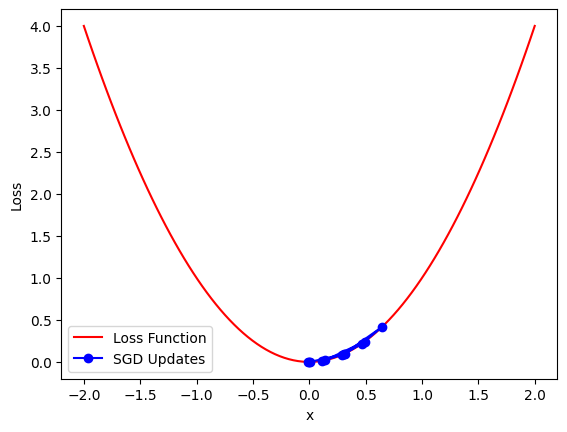

In [5]:
history = sgd()
x_vals = np.linspace(-2, 2, 100)

plt.plot(x_vals, loss(x_vals), 'r-', label='Loss Function')
plt.plot(history, loss(np.array(history)), 'bo-', label='SGD Updates')
plt.xlabel('x')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Momentum 추가

In [6]:
def sgd_momentum(lr=0.1, momentum=0.9, epochs=10):
    w = np.random.uniform(-2, 2)     # 초기 가중치
    v = 0
    history = [w]

    for _ in range(epochs):
        sample = np.random.choice(data_sample)
        grad = gradient(sample)
        v = momentum * v - lr * grad
        w += v
        history.append(w)
        
    return history

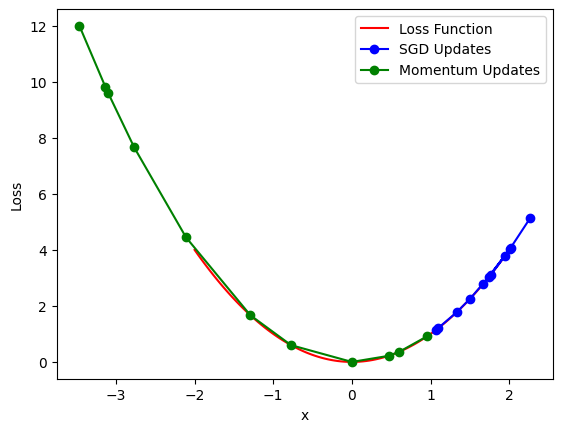

In [7]:
history = sgd()
momentum_history = sgd_momentum()

x_vals = np.linspace(-2, 2, 100)

plt.plot(x_vals, loss(x_vals), 'r-', label='Loss Function')
plt.plot(history, loss(np.array(history)), 'bo-', label='SGD Updates')
plt.plot(momentum_history, loss(np.array(momentum_history)), 'go-', label='Momentum Updates')
plt.xlabel('x')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 학습률에 따른 SGD

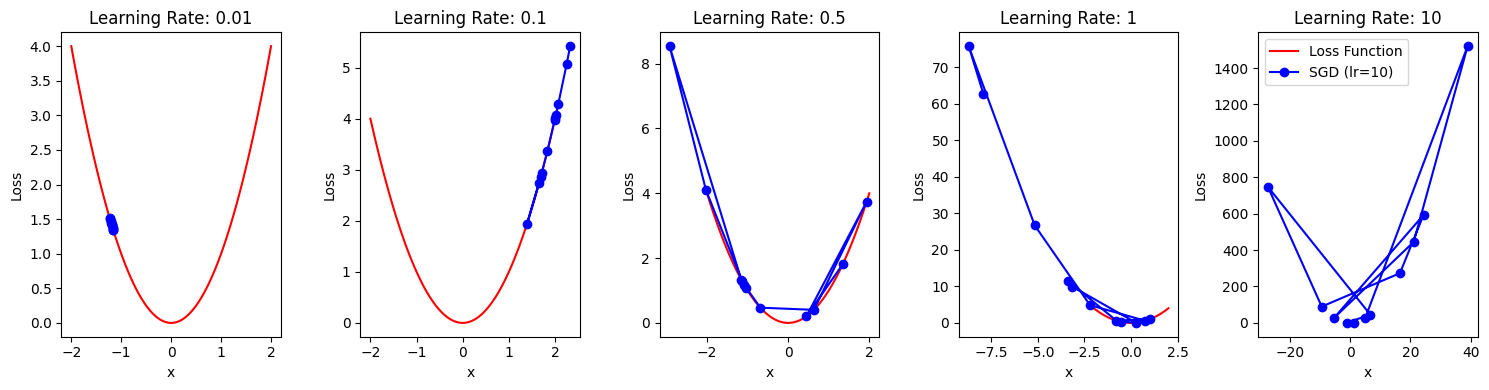

In [8]:
### 학습률에 따른 Momentum

learning_rates = [0.01, 0.1, 0.5, 1, 10]
histories = [sgd(lr=lr) for lr in learning_rates]

plt.figure(figsize=(15, 4))

for i, history in enumerate(histories):
    plt.subplot(1, len(learning_rates), i + 1)
    plt.plot(x_vals, loss(x_vals), 'r-', label='Loss Function')
    plt.plot(history, loss(np.array(history)), 'bo-', label=f'SGD (lr={learning_rates[i]})')  
    plt.title(f'Learning Rate: {learning_rates[i]}')
    plt.xlabel('x')
    plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


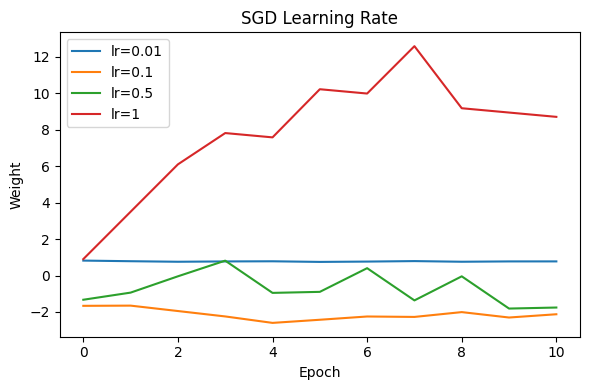

In [9]:
### 학습률에 따른 학습 과정

learning_rates = [0.01, 0.1, 0.5, 1]
histories = [sgd(lr=lr) for lr in learning_rates]

plt.figure(figsize=(6, 4))

for i, history in enumerate(histories):
    plt.plot(history, label=f'lr={learning_rates[i]}')
    plt.title('SGD Learning Rate')
    plt.xlabel('Epoch')
    plt.ylabel('Weight')
plt.legend()
plt.tight_layout()
plt.show()


### AdaGrad

In [10]:
def adagrad(lr=0.1, epsilon=1e-8, epochs=10):
    w = np.random.uniform(-2, 2)
    h = 0
    history = [w]

    for _ in range(epochs):
        
        grad = gradient(w)
        h += grad ** 2
        w -= (lr / (np.sqrt(h) + epsilon)) * grad
           
        history.append(w)

    return history

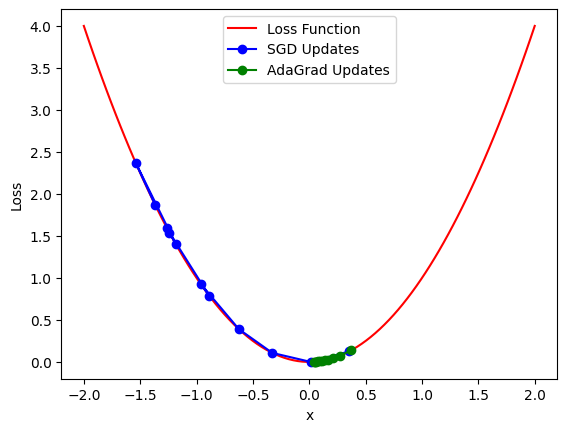

In [11]:
history = sgd()
adagrad_history = adagrad()

x_vals = np.linspace(-2, 2, 100)

plt.plot(x_vals, loss(x_vals), 'r-', label='Loss Function')
plt.plot(history, loss(np.array(history)), 'bo-', label='SGD Updates')
plt.plot(adagrad_history, loss(np.array(adagrad_history)), 'go-', label='AdaGrad Updates')
plt.xlabel('x')
plt.ylabel('Loss')
plt.legend()
plt.show()

### RMSprop

In [12]:
def rmsprop(lr=0.1, beta=0.9, epsilon=1e-8, epochs=10):
    w = np.random.uniform(-2, 2)
    h = 0
    history = [w]

    for _ in range(epochs):
        
        grad = gradient(w)
        h = (beta * h) + ((1 - beta) * grad ** 2)
        w -= (lr / (np.sqrt(h) + epsilon)) * grad
           
        history.append(w)

    return history

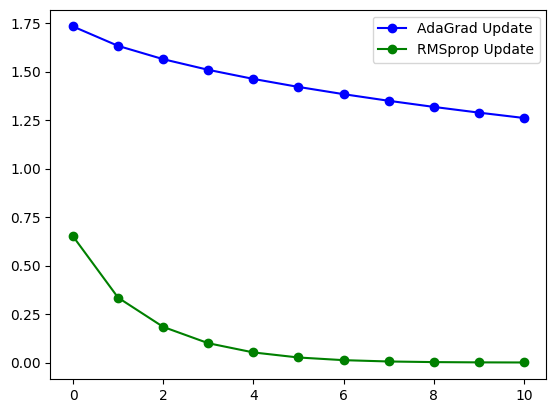

In [13]:
adagrad_history = adagrad()
rmsprop_history = rmsprop()

plt.plot(range(11), adagrad_history, 'bo-', label='AdaGrad Update')
plt.plot(range(11), rmsprop_history, 'go-', label='RMSprop Update')
plt.legend()
plt.show()

In [14]:
def adam(lr=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8, epochs=10):
    w = np.random.uniform(-2, 2)
    m, v = 0, 0
    history = [w]

    for t in range(1, epochs+1):
        grad = gradient(w)

        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad ** 2
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        w -= (lr / (np.sqrt(v_hat) + epsilon)) * m_hat
        history.append(w)

    return history

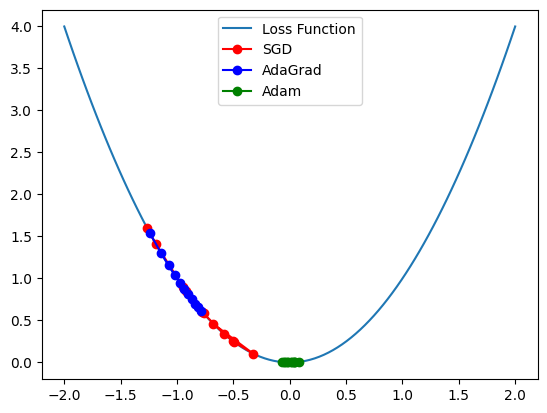

In [15]:
history = sgd()
adagrad_history = adagrad()
adam_history = adam()

x_vals = np.linspace(-2, 2, 100)
plt.plot(x_vals, loss(x_vals), label='Loss Function')

plt.plot(history, loss(np.array(history)), 'ro-', label='SGD')
plt.plot(adagrad_history, loss(np.array(adagrad_history)), 'bo-', label='AdaGrad')
plt.plot(adam_history, loss(np.array(adam_history)), 'go-', label='Adam')
plt.legend()
plt.show()

### PyTorch 활용 -> SGD vs Adam 비교

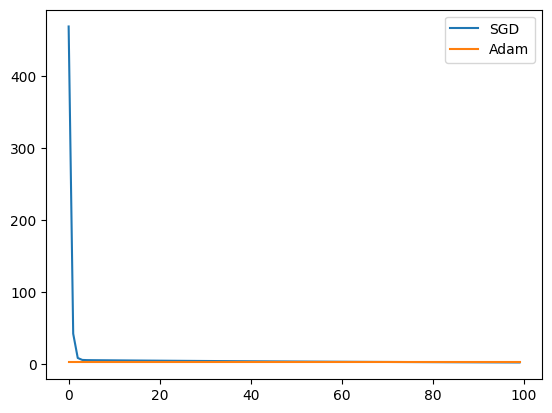

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(42)
X = torch.rand(100, 1) * 10
y = 3 * X + 5 + (torch.randn(100, 1) * 0.3)

model_sgd = nn.Linear(1, 1)
model_adam = nn.Linear(1, 1)
model_adam.load_state_dict(model_sgd.state_dict())           # 초기값을 동일하게 시작하기 위해서(시각화를 통해 비교하기 위해 추가)

criterion = nn.MSELoss()
optim_sgd = optim.SGD(model_sgd.parameters(), lr=0.01)
optim_adam = optim.Adam(model_adam.parameters(), lr=0.01)

epochs = 100
losses_sgd = []
losses_adam = []

for epoch in range(epochs):
    optim_sgd.zero_grad()                # 기울기 초기화
    outputs = model_sgd(X)               # 
    loss = criterion(outputs, y)         # 
    loss.backward()                      # 역전파를 통해서 기울기를 계산
    optim_sgd.step()                     # 기울기를 토대로 모델 파라미터를 가중치를 업데이트
    losses_sgd.append(loss.item())       # 빈배열 losses_sgd에 추가 -> 시각화를 위한 과정

for epoch in range(epochs):
    optim_adam.zero_grad()
    outputs = model_sgd(X)
    loss = criterion(outputs, y)
    loss.backward()
    optim_adam.step()
    losses_adam.append(loss.item())

plt.plot(losses_sgd, label='SGD')
plt.plot(losses_adam, label='Adam')
plt.legend()
plt.show()